## Scraping and Analyzing D1 Cross Country Athletes Heights
##### *As of November 2021
### By Samuel Kellum


In [1]:
## Importing and loading everythng we will need to use.
# Load requests
import requests
# Load BeautiulSoup
from bs4 import BeautifulSoup
# Load Regular Expression Library
import re
# Load Google Search
from googlesearch import search


# Load math
import math
# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
heights = pd.read_excel('Heights.xlsx')
heights.head()

,rank,team,heights,url,notes
0,1,Northern Arizona,No,NaN,NaN
1,2,BYU,Yes,https://byucougars.com/roster/m-cross-country,NaN
2,3,Oklahoma State,No,NaN,NaN
3,4,Notre Dame,No,NaN,NaN
4,5,Iowa State,No,NaN,NaN


In [3]:
teams = heights['team'].tolist()

In [4]:
yes = heights.loc[(heights['heights'] == "Yes")]
no = heights.loc[(heights['heights'] == "No")]

In [5]:
for i in range(3):
    for j in search(teams[i] + 'mens cross country roster', tld="com", num=1, stop=1, pause=0.5):
        print(j)

https://nauathletics.com/sports/cross-country/roster
http://byucougars.com/roster/m-cross-country
https://okstate.com/sports/mxct/roster/2021-22


In [6]:
all_urls = heights['url'].tolist()
#Removing NaN urls (urls for teams that don't have heights)
urls = [str(i) for i in all_urls if str(i) != 'nan']

In [7]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
gets = []
for i in range(len(urls)):
    gets.append(requests.get(urls[i], headers=headers))

In [8]:
prettys = []
for i in range(len(urls)):
    prettys.append((BeautifulSoup(gets[i].content, 'html.parser')).prettify())

In [9]:
results = []
for i in range(20):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))
#ETSU
results.append(re.findall("[456][']\d{1,2}", prettys[20]))
for i in range(21, 31):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))
#Kansas
results.append(re.findall("[456][\']\d{1,2}", prettys[31]))
for i in range(32, 44):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))
#Baylor
results.append(re.findall('''\"height_feet":\d,"height_inches":\d{1,2}''', prettys[44]))
for i in range(45, len(prettys)):
    results.append(re.findall('''[456][-]\d{1,2}\n''', prettys[i]))

In [10]:
## Slicing index to remove women or non-distance runners from each roster that combines genders or all track athletes
results[1] = results[1][24:]

results[2] = results[2][3:]

results[3] = results[3][27:32] +  results[3][33:38] + results[3][39:46] + results[3][47:51]

results[4] = results[4][:26]

results[5] = results[5][12:]

results[7] = results[7][15:]

results[8] = results[8][23:]

results[9] = results[9][23:]

results[10] = results[10][:29] + results[10][34:45] + results[10][72:]

results[14] = results[14][26:]

results[17] = results[17][2:]

results[19] = results[19][14:]

for i in range(len(results[20])):
    results[20][i] = results[20][i].replace("'","-")
    
results[22] = results[22][16:]

results[27] = results[27][23:]

results[29] = results[29][:10]

results[30] = results[30][21:]

results[31] = results[31][:19]
for i in range(len(results[31])):
    results[31][i] = results[31][i].replace("'","-")

results[32] = results[32][7:]

results[33] = results[33][:11]

results[34] = results[34][:11]

results[35] = results[35][3:14]

results[36] = results[36][15:]

results[39] = results[39][3:]

results[44] = sorted(results[44])
results[44] = results[44][::2]
results[44] = results[44][21:22] + results[44][29:31] + results[44][4:6] + results[44][31:] 
for i in range (len(results[44])):
    results[44][i] = re.split(':|,',results[44][i])
    results[44][i] = results[44][i][1] + "-" + results[44][i][3]

results[45] = results[45][18:]

results[49] = results[49][13:]

results[51] = results[51][23:]

results[55] = results[55][7:]

results[58] = results[58][6:]

results[59] = results[59][11:]

results[60] = results[60][7:]

results[62] = results[62][3:]

results[63] = results[63][10:]

results[67] = results[67][:18]

results[68] = results[68][38:41] + results[68][42:]

results[70] = results[70][23:24] + results[70][25:26] + results[70][34:35]

results[71] = results[71][10:]

results[71] = results[71][10:]

results[74] = results[74][10:]

results[83] = results[83][1:]

results[84] = results[84][10:]

results[85] = results[85][6:]

results[86] = results[86][:10]

In [11]:
heights_column = []
for i in range(len(results)):
    for element in range (len(results[i])):
        heights_column.append(results[i][element].strip())

In [12]:
yes['rank'].mean() , no['rank'].mean()

(183.32978723404256, 150.25333333333333)

In [13]:
yes_teams = yes['team'].tolist()
yes_rank = yes['rank'].tolist()

In [14]:
team_association = []
team_rank = []
for i in range(len(yes_teams)):
    for j in range(len(results[i])):
        team_association.append(yes_teams[i])
        team_rank.append(yes_rank[i])

In [15]:
df = pd.DataFrame({'heights': heights_column, 'teams': team_association, 'team_rank': team_rank})


In [16]:
df['inches'] = (df['heights'].astype(str).str[0].astype(int) * 12) + (df['heights'].astype(str).str[2:].astype(int)) 

In [17]:
atleast5 = df[df.groupby(['teams','team_rank'])['inches'].transform('size') >= 5]

In [18]:
average_df = pd.DataFrame(atleast5.groupby(['teams','team_rank'])['inches'].mean().sort_values())

In [19]:
atleast5

,heights,teams,team_rank,inches
0,5-11,BYU,2,71
1,5-10,BYU,2,70
2,6-1,BYU,2,73
3,6-0,BYU,2,72
4,5-9,BYU,2,69
...,...,...,...,...
1208,6-1,Mississippi Valley,316,73
1209,5-9,Mississippi Valley,316,69
1210,5-5,Mississippi Valley,316,65
1211,5-10,Mississippi Valley,316,70


In [20]:
pd.set_option('display.max_rows', 100)
average_df = average_df.reset_index()
average_df

,teams,team_rank,inches
0,Tulane,268,68.625000
1,St. Mary's (Cal.),117,68.642857
2,Presbyterian,310,68.666667
3,Houston,235,68.666667
4,Houston Baptist,226,68.777778
5,Arkansas-Pine Bluff,291,68.833333
6,Mississippi Valley,316,69.000000
7,Tennessee Tech,158,69.000000
8,UNCW,285,69.000000
9,Sam Houston St.,174,69.153846


In [21]:
average_df['inches'].describe()

count    81.000000
mean     70.300832
std       0.833260
min      68.625000
25%      69.818182
50%      70.333333
75%      70.809524
max      72.400000
Name: inches, dtype: float64

In [22]:
any_size = df.groupby(['teams','team_rank'])['inches'].mean().sort_values()
any_size

teams                team_rank
Hampton              313          68.000000
Tulane               268          68.625000
St. Mary's (Cal.)    117          68.642857
Presbyterian         310          68.666667
Houston              235          68.666667
Houston Baptist      226          68.777778
Arkansas-Pine Bluff  291          68.833333
Mississippi Valley   316          69.000000
UNCW                 285          69.000000
Tennessee Tech       158          69.000000
Sam Houston St.      174          69.153846
Idaho State          169          69.200000
Austin Peay          295          69.250000
Incarnate Word       162          69.333333
St. Peter's          306          69.500000
Fairleigh Dickinson  309          69.500000
Nevada               106          69.500000
Oral Roberts         304          69.555556
Florida Atlantic     294          69.625000
Cal Poly             77           69.645161
UC Irvine            188          69.666667
UMass Lowell         61           69.697674
T

In [23]:
average_df.corr()

,team_rank,inches
team_rank,1.000000,-0.192484
inches,-0.192484,1.000000


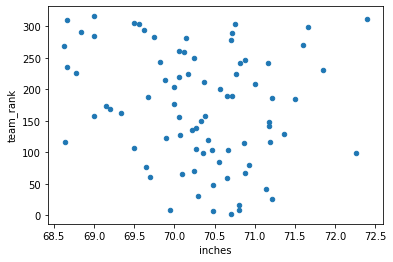

In [24]:
average_df.plot.scatter('inches','team_rank')

In [54]:
r = requests.get('https://www.lacctic.com/leagues/4/', headers=headers)

In [55]:
r.status_code

404

In [47]:
r.content

b'<!doctype html><html lang="en"><head><script async src="https://www.googletagmanager.com/gtag/js?id=G-YLC6GCTSVK"></script><script>function gtag(){dataLayer.push(arguments)}window.dataLayer=window.dataLayer||[],gtag("js",new Date),gtag("config","G-YLC6GCTSVK")</script><meta charset="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1"/><meta name="theme-color" content="#000000"/><meta name="LACCTiC" content="A website for comparing and ranking cross country performances across the country."/><script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-2118652027386667" crossorigin="anonymous"></script><link rel="manifest" href="/manifest.json"/><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700&display=swap"/><title>LACCTiC</title><link href="/static/css/2.86a5f087.chunk.css" rel="stylesheet"><link href="/static/css/main.a483425d.chunk.css" rel="stylesheet"></head><body><noscript>You nee